# Pymaceuticals Inc.
---

## A Data Analysis of Drug Regimen Affectiveness

### By Karoly Burgyan

The following is a data analysis of Capomulin performance in comparison to other drug regimens (including but not limited to Ramicane, Infubinol, and Ceftamin) in terms of squamous cell carcinoma tumor volume growth and reduction over a 45 day period of treatment. The analysis found the following conclusions:

1. Under a Capomulin regimen, weight of a mouse is positively correlated to average tumor volume with a Pearson r coefficient of 0.84.
2. If we assume that all other factors are equal or negligible in terms of drug performance, then Capomulin and Ramicane had the largest reduction in tumor volume of all the drug regimens within the 45 day period (Capomulin and Ramicane had an average tumor volume of approximately 40 mm<sup>3</sup> and the rest of the drug regimens had an average tumor volume of approximately 50 mm<sup>3</sup> (approximately 25% more tumor mass than Capomulin)).
3. If we assume that all other factors are equal or negligible in terms of drug performance, then Capomulin and Ramicane more effectively targeted the factors that influence tumor volume than Infubinol and Ceftamin as shown by the narrower interquartile range of Capomulin and Ramicane.<span>&#42;</span>
4. (Extra) If we assume that all other factors are equal or negligible in terms of drug performance, then the mice who see a reduction under the use of Capomulin have short bursts of tumor volume growth followed by a larger drop in tumor volume (i.e. a net drop in tumor volume as seen in the graph of tumor volume by timepoint for mouse l509).

<span>*</span> <font size=1>However, without further analysis, this conclusion could be due to the larger number of timepoint observations of Capomulin and Ramicane in comparison to Ibfubinol and Ceftamin.</font>
 

In [307]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_df = study_results.merge(mouse_metadata, how = 'left', on = 'Mouse ID')

# Display the data table for preview
merged_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [308]:
# Checking the number of mice.
len(merged_mouse_df['Mouse ID'].unique())

249

In [309]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique_duplicates_ids_list = merged_mouse_df.loc[merged_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
unique_duplicates_ids_list

array(['g989'], dtype=object)

In [310]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_ms = merged_mouse_df.loc[merged_mouse_df['Mouse ID'] == unique_duplicates_ids_list[0]]
duplicated_ms

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [311]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_mouse_df = merged_mouse_df.loc[merged_mouse_df['Mouse ID'] != unique_duplicates_ids_list[0]]
merged_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [312]:
# Checking the number of mice in the clean DataFrame.
len(merged_mouse_df['Mouse ID'].unique())

248

## Summary Statistics

In [313]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_grpby = merged_mouse_df.groupby('Drug Regimen')
summary_stats_df = pd.DataFrame({'Mean Tumor Volume' : drug_regimen_grpby['Tumor Volume (mm3)'].mean()})
med_s = drug_regimen_grpby['Tumor Volume (mm3)'].median()
var_s = drug_regimen_grpby['Tumor Volume (mm3)'].var()
std_s = drug_regimen_grpby['Tumor Volume (mm3)'].std()
sem_s = drug_regimen_grpby['Tumor Volume (mm3)'].sem()
summary_stats_df['Median Tumor Volume'] = med_s
summary_stats_df['Tumor Volume Variance'] = var_s
summary_stats_df['Tumor Volume Std. Dev.'] = std_s
summary_stats_df['Tumor Volume Std. Err.'] = sem_s
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [314]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2_df = drug_regimen_grpby.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_stats2_df

C:\Users\T852\AppData\Local\Temp\ipykernel_16776\1547059754.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats2_df = drug_regimen_grpby.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

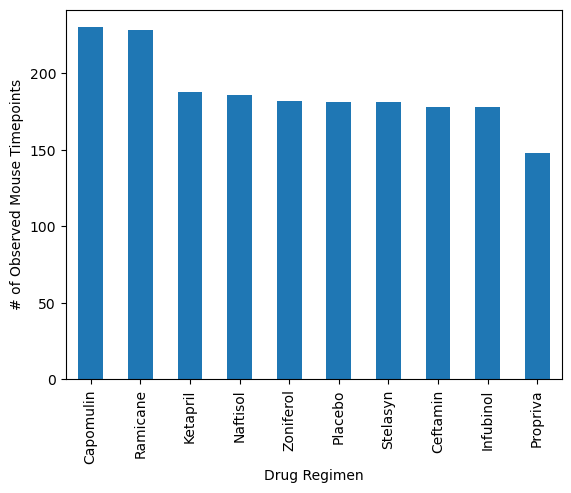

In [315]:
# Generate a bar plot showing the total number of mice_rows_for_treatment (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_count_descending_df = drug_regimen_grpby['Timepoint'].count().sort_values(ascending=False)
timepoint_count_descending_df.plot(kind='bar', ylabel = '# of Observed Mouse Timepoints')
plt.show()

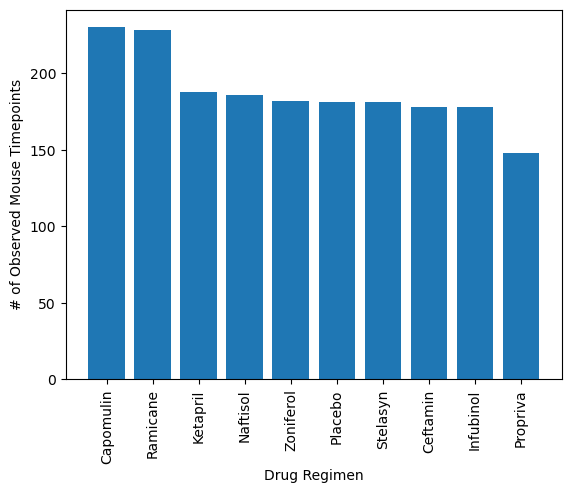

In [316]:
# Generate a bar plot showing the total number of mice_rows_for_treatment (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoint_count_descending_df.index, timepoint_count_descending_df.values)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

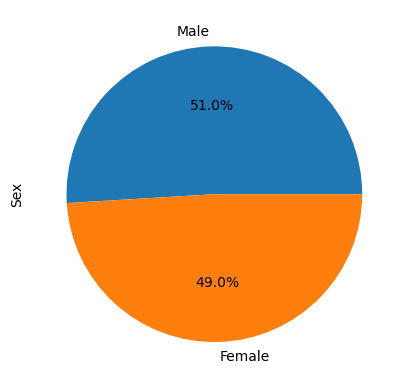

In [317]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_sex_count_descending_df = merged_mouse_df.groupby('Sex').count()['Mouse ID'].sort_values(ascending=False)

groupby_sex_count_descending_df.plot(kind='pie', ylabel = 'Sex', autopct='%1.1f%%')
plt.show()

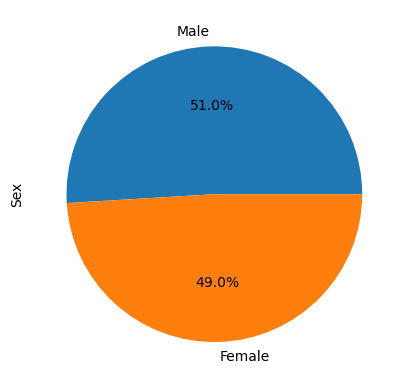

In [318]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(groupby_sex_count_descending_df, labels = groupby_sex_count_descending_df.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [329]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_regimen_df = merged_mouse_df.loc[(merged_mouse_df['Drug Regimen'] == 'Capomulin') | (merged_mouse_df['Drug Regimen'] == 'Ramicane') | (merged_mouse_df['Drug Regimen'] == 'Infubinol') | (merged_mouse_df['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
drug_regimen_groupby_ID = four_drug_regimen_df.groupby('Mouse ID')
ID_max_timepoint_s = drug_regimen_groupby_ID['Timepoint'].max()
ID_max_timepoint_df = pd.DataFrame({'Mouse ID': ID_max_timepoint_s.index, 'Timepoint': ID_max_timepoint_s.values})


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_drug_regimen_last_timepoint_df = four_drug_regimen_df.merge(ID_max_timepoint_df, how='right', on=['Mouse ID', 'Timepoint'])
four_drug_regimen_last_timepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [320]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_rows_for_treatment = four_drug_regimen_last_timepoint_df.loc[four_drug_regimen_last_timepoint_df['Drug Regimen'] == treatment]
    
    # add subset 
    tumor_volume.append(mice_rows_for_treatment['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = mice_rows_for_treatment['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    outliers = tumor_volume[-1].loc[(tumor_volume[-1].values > quartiles[0.75] + 1.5 * iqr) | (tumor_volume[-1].values < quartiles[0.25] - 1.5 * iqr)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


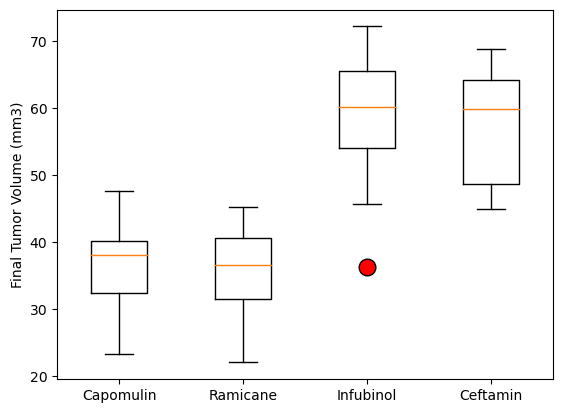

In [321]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
ax1 = plt.boxplot(tumor_volume, labels = treatments, flierprops={'markerfacecolor':'red', 'markersize': 12})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

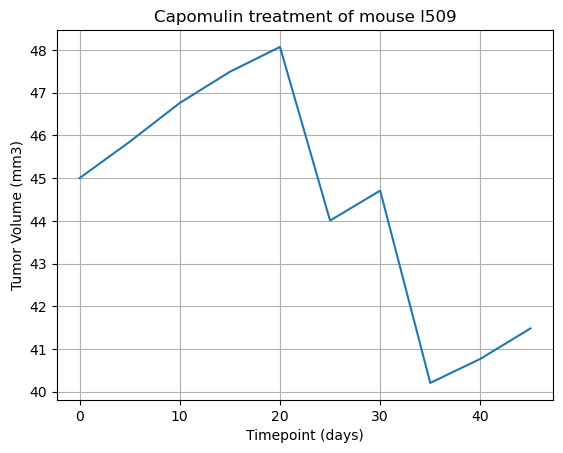

In [330]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = merged_mouse_df.loc[(merged_mouse_df['Mouse ID'] == 'l509')]
plt.plot(l509['Timepoint'], l509['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

C:\Users\T852\AppData\Local\Temp\ipykernel_16776\2345272975.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_groupby_ID_average_df = capomulin_mouse_df.groupby('Mouse ID').mean()


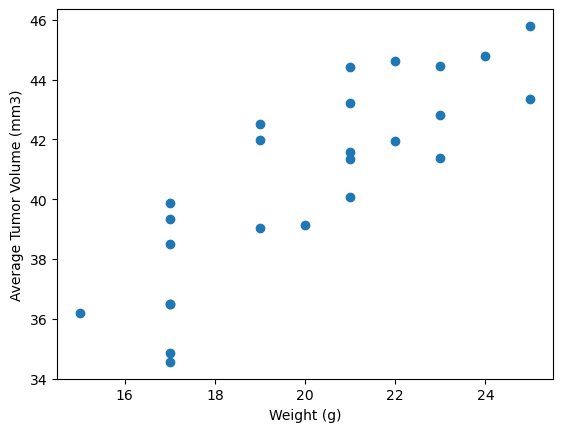

In [325]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_mouse_df = merged_mouse_df.loc[merged_mouse_df['Drug Regimen']=='Capomulin']
capomulin_groupby_ID_average_df = capomulin_mouse_df.groupby('Mouse ID').mean()
plt.scatter(capomulin_groupby_ID_average_df['Weight (g)'], capomulin_groupby_ID_average_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


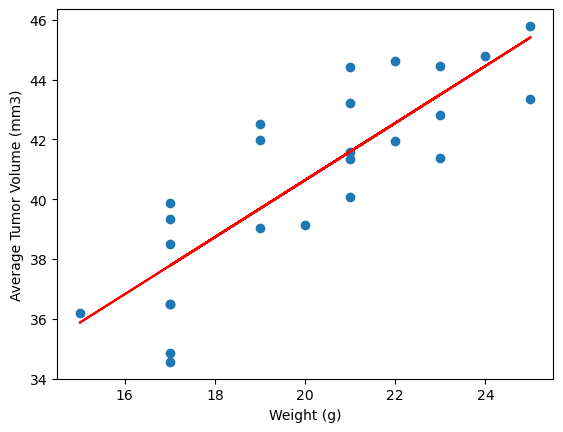

In [327]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, yIntercept, pearsonR, pValue, stdev) = st.linregress(capomulin_groupby_ID_average_df['Weight (g)'], capomulin_groupby_ID_average_df['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {pearsonR}")
regres_line = slope * capomulin_groupby_ID_average_df['Weight (g)'] + yIntercept
plt.scatter(capomulin_groupby_ID_average_df['Weight (g)'], capomulin_groupby_ID_average_df['Tumor Volume (mm3)'])
plt.plot(capomulin_groupby_ID_average_df['Weight (g)'], regres_line, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()